<a href="https://colab.research.google.com/github/jjeongab/comp4211_pa1/blob/main/comp4211_pa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import math

Part1: Processing Data 

In [ ]:
training_data = pd.read_csv("/content/train.csv")
training_data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.10,4.15,0.02,2.00,0.005,4.25,0.19,1.23,0.86,0.87,...,0.019,16.16,1.18,0.007,34.48,1.62,0.01,0.21,0.08,0.0
1,0.01,4.32,0.07,0.96,0.020,0.08,0.02,0.05,1.05,0.00,...,0.196,6.73,0.16,0.003,2.70,1.64,0.01,0.03,0.08,0.0
2,0.09,0.15,0.09,0.14,0.050,0.12,0.07,0.07,1.06,0.00,...,0.061,1.71,1.00,0.000,0.24,5.22,0.01,0.03,0.06,0.0
3,0.03,18.94,0.08,1.37,0.050,0.07,0.02,0.02,0.64,0.00,...,0.005,1.16,0.89,0.001,1.47,0.94,0.07,0.07,0.05,0.0
4,0.04,23.31,0.07,0.26,0.040,0.15,0.05,1.57,0.43,0.04,...,0.089,14.90,0.73,0.005,1.76,4.54,0.03,0.07,0.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,0.07,12.95,0.07,0.63,0.020,0.02,0.08,1.11,1.19,0.00,...,0.100,3.68,0.33,0.001,5.36,0.99,0.04,0.02,0.02,0.0
7492,0.20,23.74,0.04,0.74,0.001,1.12,0.17,0.85,0.14,0.41,...,0.183,13.53,1.37,0.010,46.84,7.74,0.03,0.03,0.02,0.0
7493,0.07,12.95,0.07,0.63,0.020,0.02,0.08,1.11,1.19,0.00,...,0.100,3.68,0.33,0.001,5.36,0.99,0.04,0.02,0.02,0.0
7494,0.07,12.95,0.07,0.63,0.020,0.02,0.08,1.11,1.19,0.00,...,0.100,3.68,0.33,0.001,5.36,0.99,0.04,0.02,0.02,0.0


In [ ]:
no_of_row = training_data.shape[0]
no_of_col = training_data.shape[1]
mean_val = training_data.mean(axis = 0) #mean values for each of the column 
iteration = 0
for column in training_data: #replace the null value to mean_value of the columns
  if column != 'is_safe':
    training_data[column] = training_data[column].fillna(mean_val[column])
training_data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.10,4.15,0.02,2.00,0.005,4.25,0.19,1.23,0.86,0.87,...,0.019,16.16,1.18,0.007,34.48,1.62,0.01,0.21,0.08,0.0
1,0.01,4.32,0.07,0.96,0.020,0.08,0.02,0.05,1.05,0.00,...,0.196,6.73,0.16,0.003,2.70,1.64,0.01,0.03,0.08,0.0
2,0.09,0.15,0.09,0.14,0.050,0.12,0.07,0.07,1.06,0.00,...,0.061,1.71,1.00,0.000,0.24,5.22,0.01,0.03,0.06,0.0
3,0.03,18.94,0.08,1.37,0.050,0.07,0.02,0.02,0.64,0.00,...,0.005,1.16,0.89,0.001,1.47,0.94,0.07,0.07,0.05,0.0
4,0.04,23.31,0.07,0.26,0.040,0.15,0.05,1.57,0.43,0.04,...,0.089,14.90,0.73,0.005,1.76,4.54,0.03,0.07,0.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,0.07,12.95,0.07,0.63,0.020,0.02,0.08,1.11,1.19,0.00,...,0.100,3.68,0.33,0.001,5.36,0.99,0.04,0.02,0.02,0.0
7492,0.20,23.74,0.04,0.74,0.001,1.12,0.17,0.85,0.14,0.41,...,0.183,13.53,1.37,0.010,46.84,7.74,0.03,0.03,0.02,0.0
7493,0.07,12.95,0.07,0.63,0.020,0.02,0.08,1.11,1.19,0.00,...,0.100,3.68,0.33,0.001,5.36,0.99,0.04,0.02,0.02,0.0
7494,0.07,12.95,0.07,0.63,0.020,0.02,0.08,1.11,1.19,0.00,...,0.100,3.68,0.33,0.001,5.36,0.99,0.04,0.02,0.02,0.0


In [ ]:
training_data =training_data.drop_duplicates() #dropping the duplicates 

In [ ]:
training_data_corr = training_data.corr()
training_data_corr = round(training_data_corr, 3)
#trying to retrieve the csv files to get correlation between two features in dataFrame 
#training_data_corr_df = pd.DataFrame(data = training_data_corr)
#training_data_corr_df.to_csv(index = False)
#compression_opts = dict(method='zip', archive_name = 'out.csv')
#training_data_corr_df.to_csv('out.zip', index = False, compression = compression_opts)
#os.makedirs('/training_data_corr', exist_ok=True)
#training_data_corr_df.to_csv('/training_data_corr/out.csv')



[]

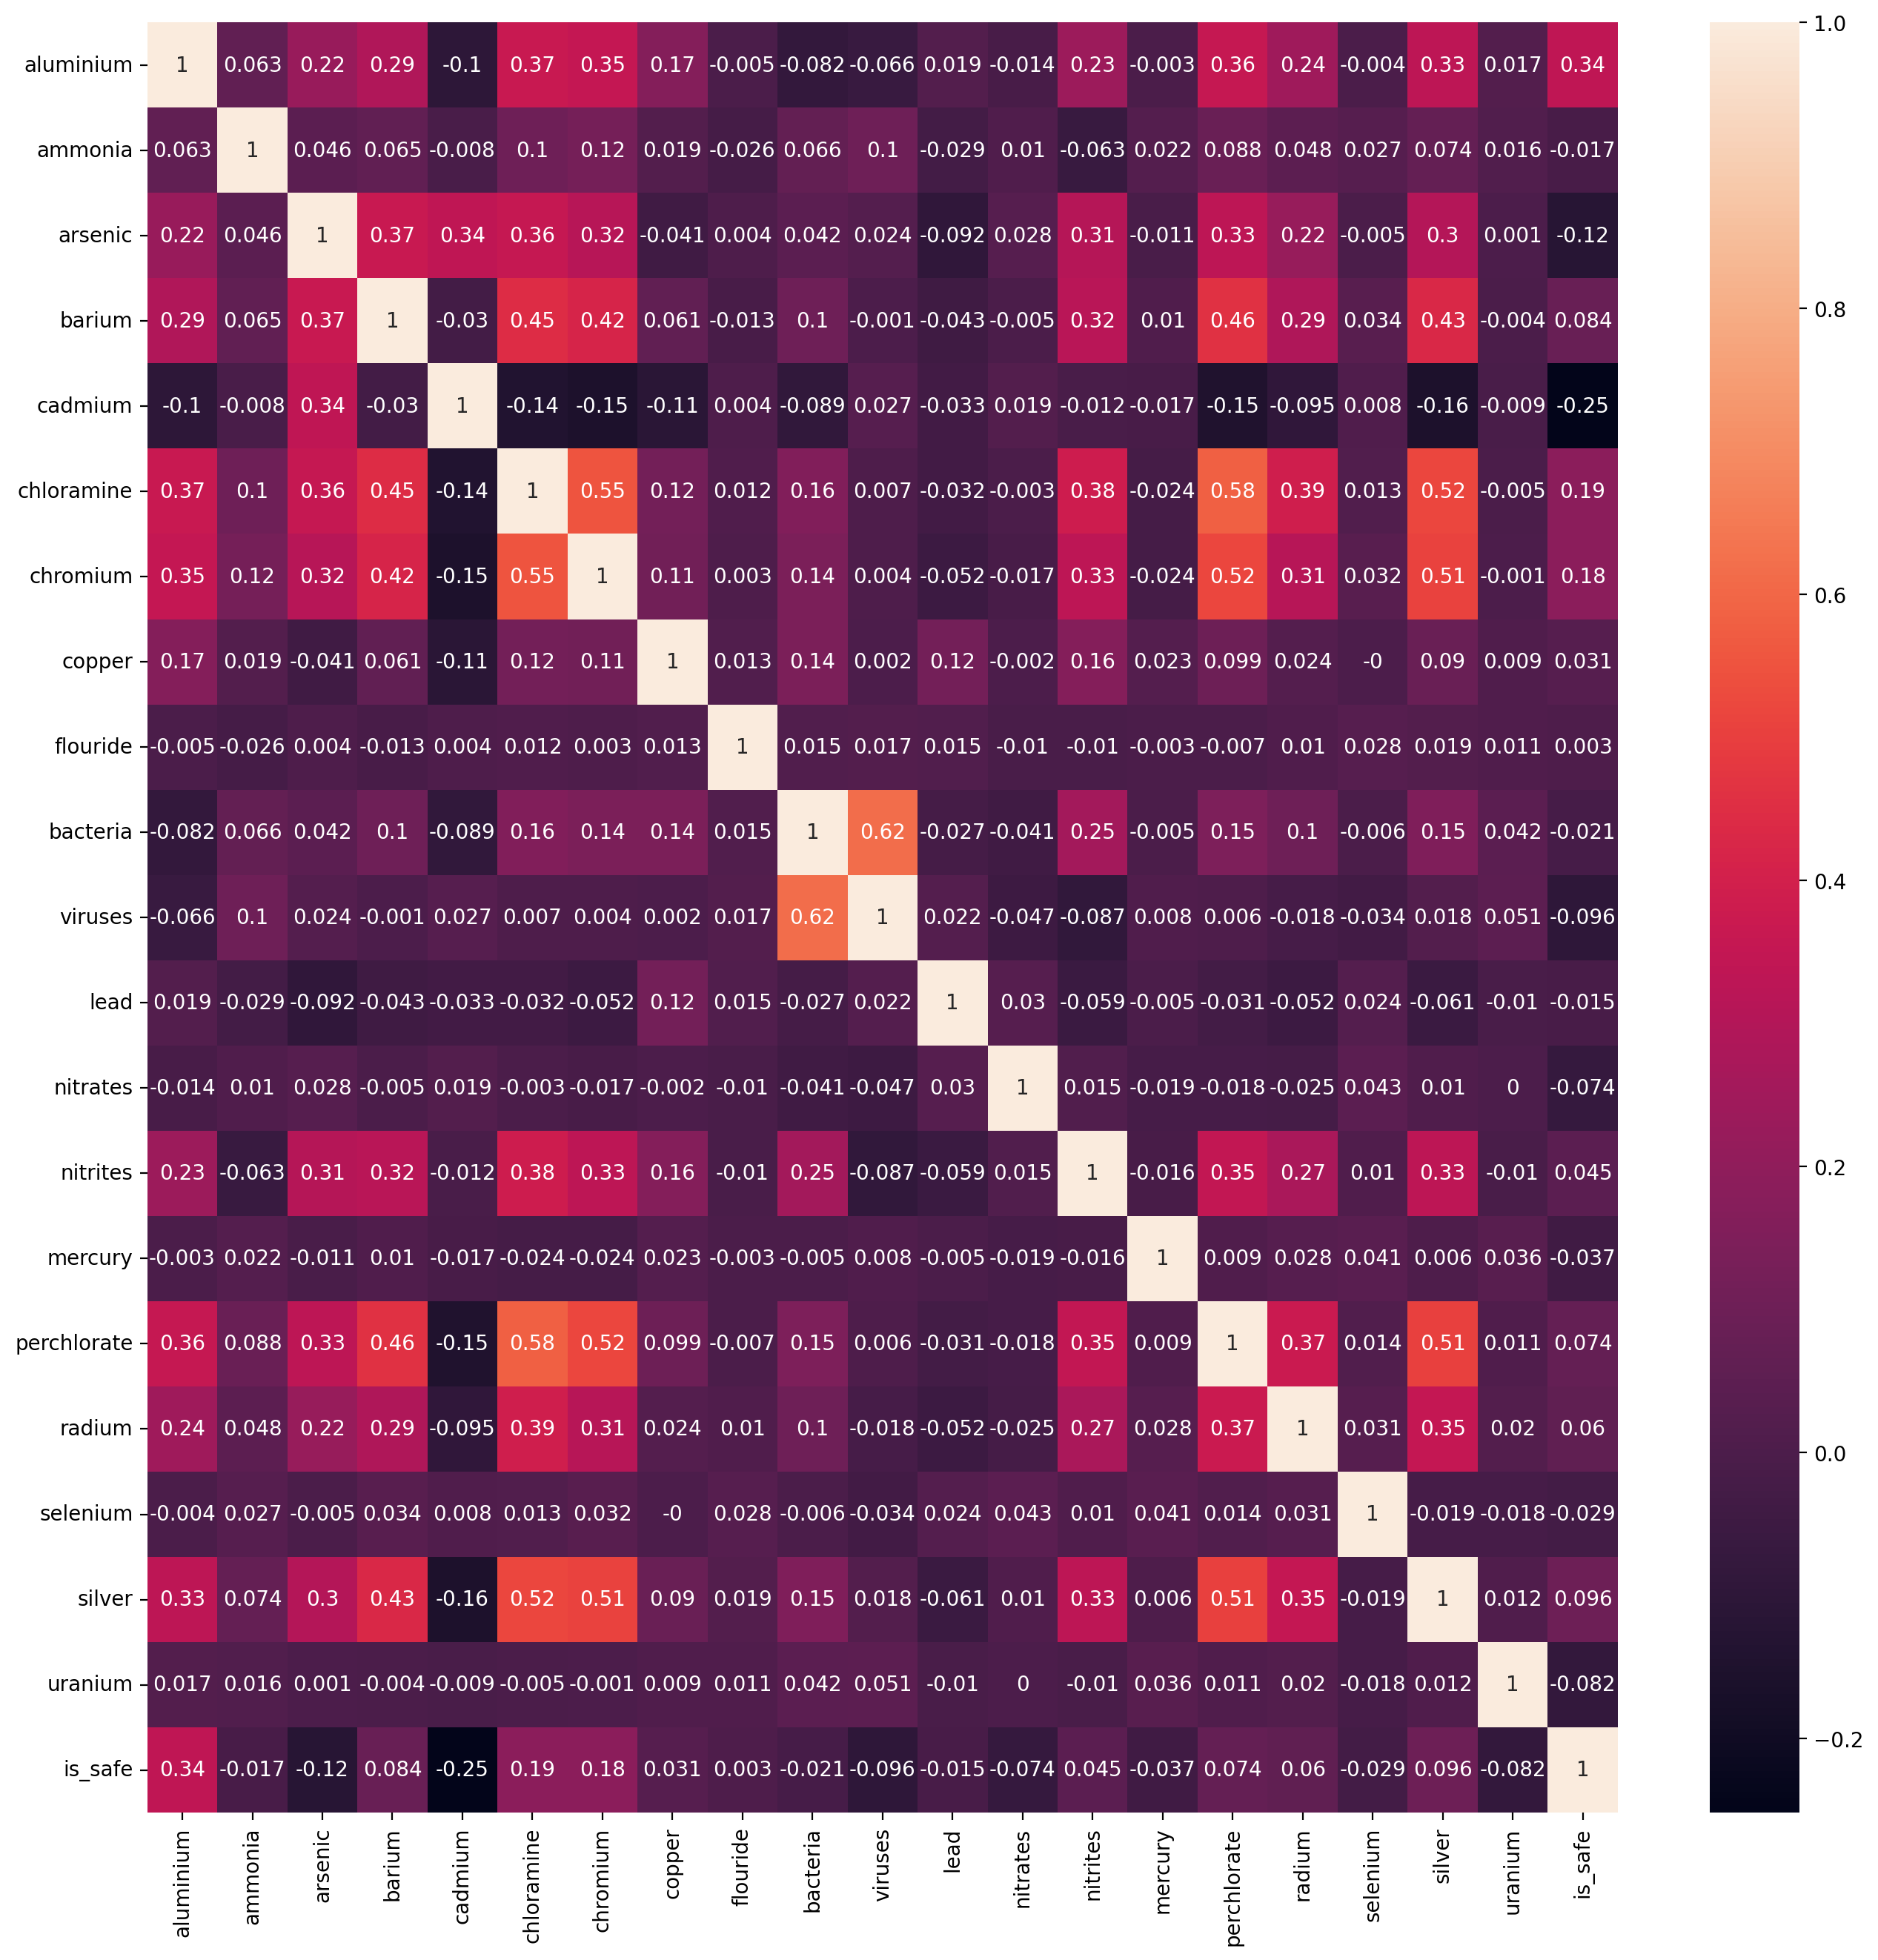

In [ ]:
 #plotting a figure with heatmap representing correlation between two features 
 plt.figure(figsize = (16, 16), dpi = 200)
 sns.heatmap(training_data_corr, annot = True)
 plt.plot()

### Part2. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
abs(training_data_corr['chloramine']).sort_values(ascending = False)

chloramine     1.000
perchlorate    0.583
chromium       0.552
silver         0.520
barium         0.447
radium         0.389
nitrites       0.380
aluminium      0.369
arsenic        0.358
is_safe        0.188
bacteria       0.157
cadmium        0.140
copper         0.116
ammonia        0.103
lead           0.032
mercury        0.024
selenium       0.013
flouride       0.012
viruses        0.007
uranium        0.005
nitrates       0.003
Name: chloramine, dtype: float64

In [ ]:
top_6_chloramine = abs(training_data_corr['chloramine']).sort_values(ascending = False)[1:7].index #gettig top six features correlated to chloramine

In [ ]:
top_6_chloramine #(.., .., .., .., .., ..)
to_chl_train = dict()
to_chl_cv = dict()
y_train = dict()
y_cv = dict()
print(top_6_chloramine)

Index(['perchlorate', 'chromium', 'silver', 'barium', 'radium', 'nitrites'], dtype='object')


In [ ]:
for indexes in top_6_chloramine:
  to_chl_train[indexes], to_chl_cv[indexes], y_train[indexes], y_cv[indexes] = train_test_split(training_data[indexes], training_data['chloramine'], test_size = 0.2, random_state = 4211)
to_chl_train['chloramine'], to_chl_cv['chloramine'], y_train['chloramine'], y_cv['chloramine'] = train_test_split(training_data[indexes], training_data['chloramine'], test_size = 0.2, random_state = 4211)

In [ ]:
model = LinearRegression()
R2_scores = dict()
coef_list = dict()
intercept_list = dict()
MSE_values = dict()

Q2. R2 squared value for each features

In [ ]:
for key in to_chl_train.keys():
  reg = model.fit(to_chl_train[key].to_numpy().reshape(-1, 1), y_train[key])
  R2_scores[key] = reg.score(to_chl_cv[key].to_numpy().reshape(-1, 1), y_cv[key])
  coef_list[key] = reg.coef_
  intercept_list[key] = reg.intercept_


In [ ]:
R2_scores

{'perchlorate': 0.34727163558690066,
 'chromium': 0.31138489178953244,
 'silver': 0.29193122809804095,
 'barium': 0.20172329883347928,
 'radium': 0.18902582154390013,
 'nitrites': 0.16750631273340033,
 'chloramine': 0.16750631273340033}

In [ ]:
from sklearn.metrics import mean_squared_error

# **Q3.Plot the regression line and the data points of the validation set for each of the first six models.**
# **Q4.)Get the MSE of seven models in the validation sets**

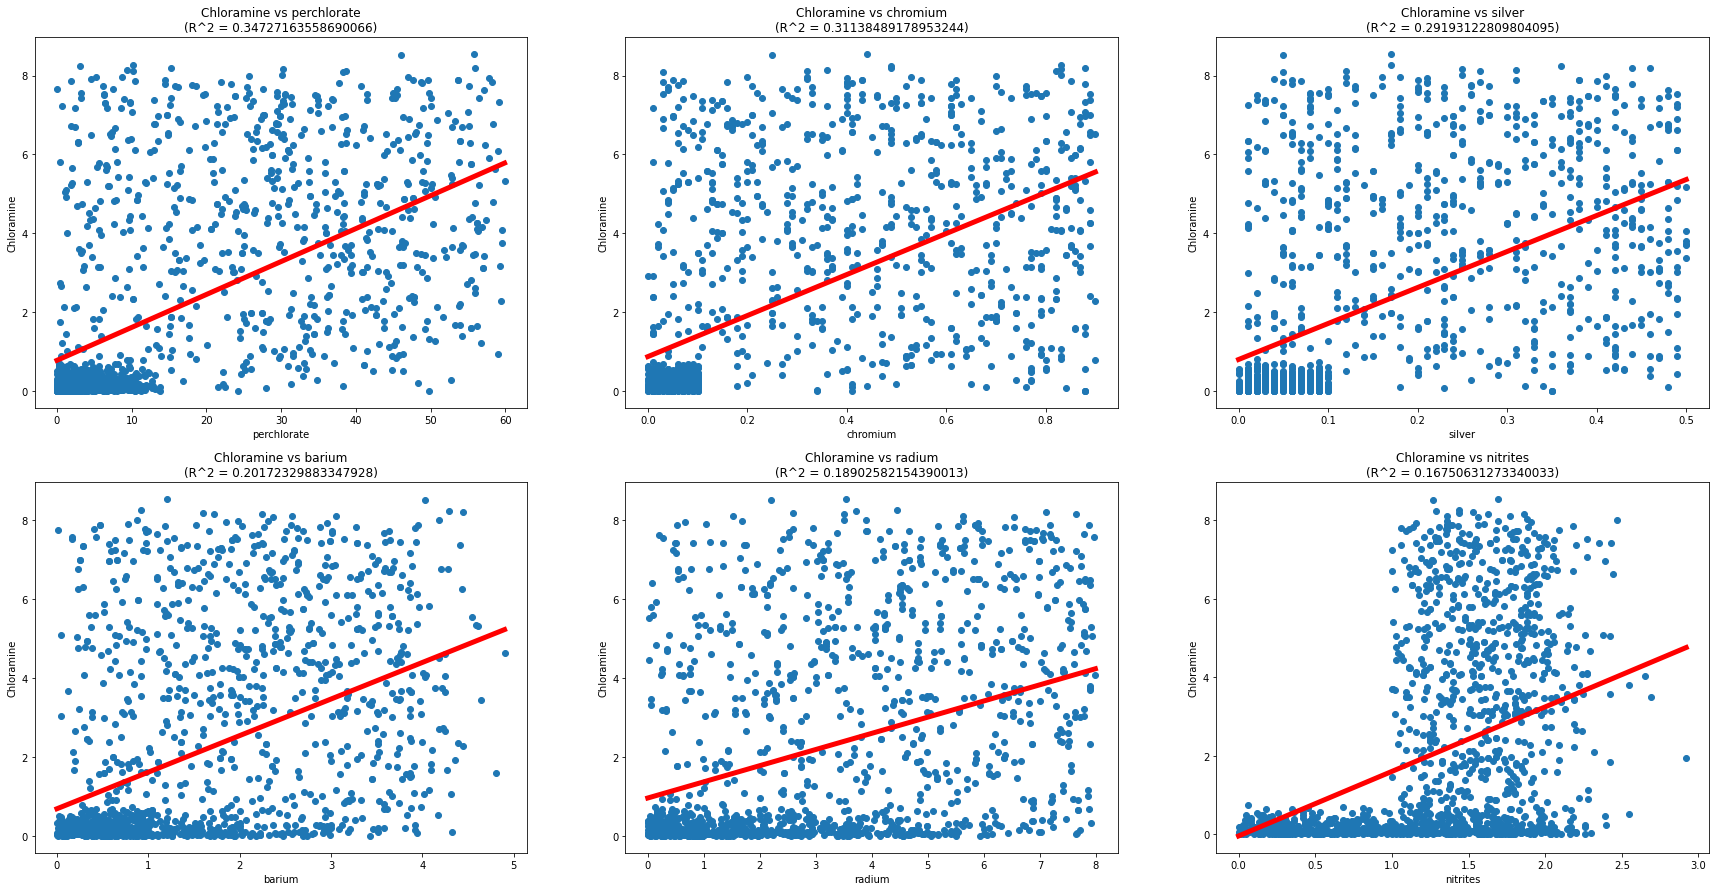

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches([30, 15])
for i,ax in enumerate(axs.flat):
  key_val = top_6_chloramine[i] 
  ax.scatter(to_chl_cv[key_val], y_cv[key_val])
  xfit = np.linspace(to_chl_cv[key_val].min(), to_chl_cv[key_val].max(), to_chl_cv[key_val].shape[0])
  yfit = coef_list[key_val] * xfit + intercept_list[key_val]
  ax.plot(xfit, yfit, 'r', linewidth = 5)
  R2_val = R2_scores[key_val]
  MSE_values[key_val] = mean_squared_error(to_chl_cv[key_val], yfit)
  ax.set_title("Chloramine vs " + key_val +'\n' + "(R^2 = " + str(R2_val) + ")")
  ax.set(xlabel= key_val ,ylabel="Chloramine")
xfit = np.linspace(to_chl_cv['chloramine'].min(), to_chl_cv['chloramine'].max(), to_chl_cv['chloramine'].shape[0])
yfit = coef_list['chloramine'] * xfit + intercept_list['chloramine']
R2_val = R2_scores['chloramine']
MSE_values['chloramine'] = mean_squared_error(to_chl_cv['chloramine'], yfit)
plt.show()

In [ ]:
MSE_values

{'perchlorate': 484.942623940425,
 'chromium': 10.649784982533589,
 'silver': 10.348541392241303,
 'barium': 5.041604915392524,
 'radium': 6.438940041702916,
 'nitrites': 3.3454788610708026,
 'chloramine': 3.3454788610708026}

## Q5. Attributes with least correlation to 'Chloramine'

In [ ]:
least_corr_attribute = abs(training_data_corr['chloramine']).sort_values(ascending = True)[0:1]
least_attr = least_corr_attribute.index
print(least_attr)
#Cadmium is the least correlated attributes to chloramine

Index(['nitrates'], dtype='object')


In [ ]:
to_chl_train['nitrates'], to_chl_cv['nitrates'], y_train['nitrates'], y_cv['nitrates'] = train_test_split(training_data['nitrates'], training_data['chloramine'], test_size = 0.2, random_state = 4211)

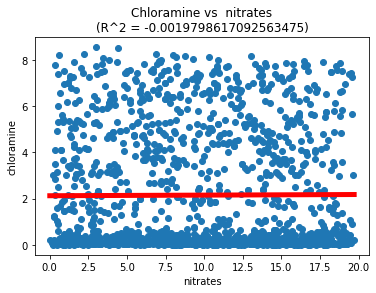

In [ ]:
#get the linear regression for cadmium
reg = model.fit(to_chl_train['nitrates'].to_numpy().reshape(-1, 1), y_train['chloramine'])
R2_scores['nitrates'] = reg.score(to_chl_cv['nitrates'].to_numpy().reshape(-1, 1), y_cv['chloramine'])
coef_list['nitrates'] = reg.coef_
intercept_list['nitrates'] = reg.intercept_
plt.scatter(to_chl_cv['nitrates'],y_cv['nitrates'])
xfit = np.linspace(to_chl_cv['nitrates'].min(), to_chl_cv['nitrates'].max(), to_chl_cv['nitrates'].shape[0])
yfit = coef_list['nitrates'] * xfit + intercept_list['nitrates']
plt.plot(xfit, yfit, 'r', linewidth = 5)
plt.title("Chloramine vs " + " nitrates" +'\n' + "(R^2 = " + str(R2_scores['nitrates']) + ")")
plt.xlabel('nitrates')
plt.ylabel("chloramine")
plt.show()

# Q6.Feedforward Neural Network
# Q7.Feedforward Neural Network 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from time import perf_counter, sleep
from sklearn.datasets import make_regression
from statistics import mean
from statistics import stdev

In [ ]:
X = training_data[['perchlorate', 'chromium', 'silver', 'barium', 'radium', 'nitrites']]
Y = training_data['chloramine']
#X = X /(np.max(X.values) - np.min(X.values))
#X, Y = make_regression(n_samples=200, random_state=1)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4211)
X, Y = make_regression(n_samples=200, random_state=4211)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state =4211)
H = (1, 4, 16, 64, 128)
mlp_list = list()
time_records = list()
R2_scores = list()
'''
for val in H:
  mlp = MLPClassifier(hidden_layer_sizes=(val, val, val), max_iter=120, alpha=1e-4,
                   solver='sgd', verbose=10, random_state=4211, learning_rate_init=.1)
  time = list()
  for i in range(3):
    #start measuring the training time 
    start = perf_counter()
    #start the training
    mlp.fit(X_train, Y_train.astype('int'))
    end = perf_counter()
    print(f"time record{start-end}")
'''
for val in H:
  regr = MLPRegressor(hidden_layer_sizes=(val, val, val), early_stopping = True, max_iter = 1000, random_state =4211)
  time = list()
  R2 = list()
  for i in range(3):
    #regr = MLPRegressor(hidden_layer_sizes=(val, val, val), early_stopping = True, max_iter = 1000, random_state =4211)
    #start measuring the training time 
    start = perf_counter()
    #start the training
    regr.fit(X_train, Y_train)
    end = perf_counter()
    #regr.predict(X_test[:2])
    print(f"regr score for H = {val} in {i + 1} trial: {regr.score(X_test, Y_test)}")
    time.append(end - start)
    R2.append(regr.score(X_test, Y_test))
    print(f"time record: {end-start}")
  time_records.append(time)
  R2_scores.append(R2)
time_record_mean = [mean(times) for times in time_records]
time_record_stdev = [stdev(times) for times in time_records]
R2_scores_mean = [mean(R2s) for R2s in R2_scores]
R2_scores_stdev = [stdev(R2s) for R2s in R2_scores]

regr score for H = 1 in 1 trial: -1.7135175041094186e-06
time record: 0.022335696000027383
regr score for H = 1 in 2 trial: -1.7135175041094186e-06
time record: 0.020715279999876657
regr score for H = 1 in 3 trial: -1.7135175041094186e-06
time record: 0.021013028000197664
regr score for H = 4 in 1 trial: 8.018603997672624e-05
time record: 0.024533189000067068
regr score for H = 4 in 2 trial: 8.018603997672624e-05
time record: 0.02444380099996124
regr score for H = 4 in 3 trial: 8.018603997672624e-05
time record: 0.026261931999670196
regr score for H = 16 in 1 trial: 0.0015447442431593128
time record: 0.029524900000069465
regr score for H = 16 in 2 trial: 0.0015447442431593128
time record: 0.02775792000011279
regr score for H = 16 in 3 trial: 0.0015447442431593128
time record: 0.02425414199979059
regr score for H = 64 in 1 trial: 0.3365709890438229
time record: 0.4284521629997471
regr score for H = 64 in 2 trial: 0.3365709890438229
time record: 0.3295382520000203
regr score for H = 64 i

In [ ]:
time_record_mean

[0.0213546680000339,
 0.025079640666566167,
 0.027178987333324283,
 0.3759768699998555,
 0.7061329063332474]

In [ ]:
time_record_stdev

[0.0008625400979097711,
 0.0010248693335691162,
 0.00268264696687471,
 0.04973249974722463,
 0.022649513568071263]

In [ ]:
R2_scores_mean

[-1.7135175041094186e-06,
 8.018603997672624e-05,
 0.0015447442431593128,
 0.3365709890438229,
 0.6981221802303939]

In [ ]:
R2_scores_stdev

[0.0, 0.0, 0.0, 0.0, 0.0]

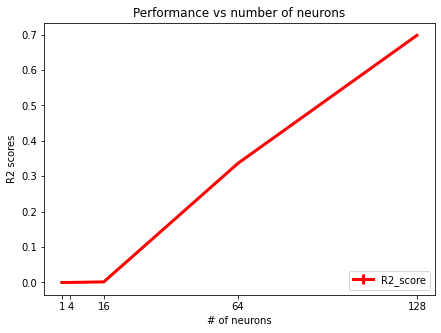

In [ ]:
fig = plt.figure(figsize=(7, 5))
plt.errorbar(H, R2_scores_mean, R2_scores_stdev, color='red', linewidth=3, label='R2_score')
plt.xticks(H)
plt.xlabel('# of neurons')
plt.ylabel('R2 scores')
plt.title('Performance vs number of neurons')
plt.legend(loc="lower right")
plt.show()

# 6 Part3: Classification 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [ ]:
#X = training_data[[i for i in training_data.columns if i != "is_safe" ]]
#Y = training_data["is_safe"]
train_df, test_df = train_test_split(training_data, test_size = 0.2, random_state = 4211)

In [ ]:
X_train= train_df[[i for i in training_data.columns if i != "is_safe" ]]
Y_train = train_df["is_safe"]
X_test = test_df[[i for i in training_data.columns if i != "is_safe" ]]
Y_test = test_df["is_safe"]

In [ ]:
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=mutual_info_classif, k = 15)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
#all transformed already 
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
#fs_scores = fs.scores_.sort()
fs_score_records = zip(fs.feature_names_in_, fs.scores_)
zipped = list(fs_score_records)
res = sorted(zipped, key = lambda x: x[1])
res = res[5:]
features15 = list()

In [ ]:
for name, score in res:
  print(f"{name}: {score}")
  features15.append(name)
features15 # have 15 most relevant features 

selenium: 0.0
flouride: 0.002469021995736842
bacteria: 0.00300330916381486
nitrites: 0.005297005914683961
mercury: 0.006511951009255057
radium: 0.007767548978730776
uranium: 0.008501920751191161
viruses: 0.011925877281608877
silver: 0.012191485404132285
perchlorate: 0.01651997458510346
chloramine: 0.022631265727407035
chromium: 0.02535513608005746
arsenic: 0.031451614932437755
aluminium: 0.06734349772017545
cadmium: 0.07181961764425093


['selenium',
 'flouride',
 'bacteria',
 'nitrites',
 'mercury',
 'radium',
 'uranium',
 'viruses',
 'silver',
 'perchlorate',
 'chloramine',
 'chromium',
 'arsenic',
 'aluminium',
 'cadmium']

# 6.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
X_train_logreg1 = X_train[features15]
Y_train_logreg1 = Y_train 
X_test_logreg1 = X_test[features15]
Y_test_logreg1 = Y_test
eta0_list = list()
f1_scores_mean = list()
f1_scores_stdev = list()
accuracy_scores_mean = list()
accuracy_scores_stdev = list()
times_mean = list()
times_stdev = list()

In [ ]:
#logreg = LogisticRegression(l1_ratio = 0.1, max_iter = 1000, solver = "lbfgs")
#logreg.fit(X_train_logreg ,Y_train_logreg)
i = 0.2
while i < 1:
  #repeat 3 times 
  logreg1 = SGDClassifier(eta0 = 1 - i, loss = "log_loss", max_iter=1000)
  eta0_list.append(1 - i)
  f1_scores_list = list()
  accuracy_scores_list = list()
  times_list = list()
  for j in range(3):
    start = perf_counter()
    #training starts from here 
    logreg1.fit(X_train_logreg1, Y_train_logreg1)
    end = perf_counter()
    score = logreg1.score(X_train_logreg1, Y_train_logreg1)
    ypred = logreg1.predict(X_test_logreg1)
    print(f"Time duration for when eta0 = {1- i} in {j + 1} trials: {end-start}")
    print(f"Score for when eta0 = {1- i} in {j + 1} trials: {score}")
    print('Accuracy: {:.4f}'.format(accuracy_score(Y_test_logreg1 , ypred)))
    print('F1_score: {:.4f}'.format(f1_score(Y_test_logreg1 , ypred)))
    f1_scores_list.append(f1_score(Y_test_logreg1 , ypred)) # get the f1_scroes 
    accuracy_scores_list.append(accuracy_score(Y_test_logreg1 , ypred))
    times_list.append(end-start)
  print(f"f1 means is {mean(f1_scores_list)}")
  f1_scores_mean.append(mean(f1_scores_list))
  print(f"f1 stdev is {stdev(f1_scores_list)}")
  f1_scores_stdev.append(stdev(f1_scores_list))
  print(f"accuracy mean is {mean(accuracy_scores_list)}")
  accuracy_scores_mean.append(mean(accuracy_scores_list))
  print(f"accuracy stdev is {stdev(accuracy_scores_list)}")
  accuracy_scores_stdev.append(stdev(accuracy_scores_list))
  print(f"time mean is {mean(times_list)}")
  times_mean.append(mean(times_list))
  print(f"time stdev is {stdev(times_list)}")
  times_stdev.append(stdev(times_list))
  i += 0.2
  

Time duration for when eta0 = 0.8 in 1 trials: 0.13778221199982
Score for when eta0 = 0.8 in 1 trials: 0.7835302293259208
Accuracy: 0.7840
F1_score: 0.4610
Time duration for when eta0 = 0.8 in 2 trials: 0.14950634400020135
Score for when eta0 = 0.8 in 2 trials: 0.9054899235580264
Accuracy: 0.9000
F1_score: 0.3208
Time duration for when eta0 = 0.8 in 3 trials: 0.18867776800016145
Score for when eta0 = 0.8 in 3 trials: 0.8802988186240445
Accuracy: 0.8625
F1_score: 0.4975
f1 means is 0.4264072817406338
f1 stdev is 0.09329588208476379
accuracy mean is 0.8488425925925926
accuracy stdev is 0.059180086723568226
time mean is 0.15865544133339426
time stdev is 0.026652746418617944
Time duration for when eta0 = 0.6 in 1 trials: 0.12318955399996412
Score for when eta0 = 0.6 in 1 trials: 0.9027102154273802
Accuracy: 0.8993
F1_score: 0.5367
Time duration for when eta0 = 0.6 in 2 trials: 0.24095018600019102
Score for when eta0 = 0.6 in 2 trials: 0.6895413481584434
Accuracy: 0.6993
F1_score: 0.3944
Ti

## Q10.Calculate the confusion matrix 

In [ ]:
logreg2 = SGDClassifier(loss = "log_loss", max_iter= 3000, eta0 = 0.4, random_state = 4211)
X_train_logreg2 = X_train_logreg1
Y_train_logreg2 = Y_train_logreg1 
X_test_logreg2 = X_test_logreg1
Y_test_logreg2 = Y_test_logreg1

In [ ]:
logreg2.fit(X_train_logreg2, Y_train_logreg2)
y_pred2 = logreg2.predict(X_test_logreg2 )

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test_logreg2, y_pred2)
cnf_matrix

array([[1270,    4],
       [ 149,   17]])

## Q11.Train the models with other solver

In [ ]:
solvers = ["sag", "lbfgs", "sgd"]

In [ ]:
logreg_sgd = SGDClassifier(loss = "log_loss", max_iter=3000, eta0 = 0.4, random_state = 4211)
logreg_lbfgs = LogisticRegression(solver = 'lbfgs', random_state = 4211, max_iter = 3000)
logreg_sag = LogisticRegression(solver = 'sag', random_state = 4211, max_iter = 3000)
lists_of_models = [logreg_sgd, logreg_lbfgs, logreg_sag]

In [ ]:
for model in lists_of_models:
  model.fit(X_train_logreg1,Y_train_logreg1)
  ypred = model.predict(X_test_logreg1)
  print(f"model: {model}, f1_scores: {f1_score(Y_test_logreg1 , ypred)} Accuracy: {accuracy_score(Y_test_logreg1 , ypred)}")

model: SGDClassifier(eta0=0.4, loss='log_loss', max_iter=3000, random_state=4211), f1_scores: 0.18181818181818182 Accuracy: 0.89375
model: LogisticRegression(max_iter=3000, random_state=4211), f1_scores: 0.39999999999999997 Accuracy: 0.8979166666666667
model: LogisticRegression(max_iter=3000, random_state=4211, solver='sag'), f1_scores: 0.39999999999999997 Accuracy: 0.8979166666666667


## Feedforward Neural Network on Logistic Regression

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
H = [1, 4, 16, 64, 128]
np.min(X_train_logreg1.values), np.max(X_train_logreg1.values)
scaler1 = StandardScaler()
scaler2 = StandardScaler()
#traditional scaling method 
#X_train_logreg3 = X_train_logreg1.values/(np.max(X_train_logreg1.values) - np.min(X_train_logreg1.values))
scaler1.fit(X_train_logreg1)
X_train_logreg3 = scaler1.transform(X_train_logreg1)

In [ ]:
Y_train_logreg3 = Y_train 
scaler2.fit(X_test_logreg1)
X_test_logreg3  = scaler2.transform(X_test_logreg1)
#X_test_logreg3 = X_test_logreg1.values/(np.max(X_test_logreg1.values) - np.min(X_test_logreg1.values))
Y_test_logreg3 = Y_test
training_time_mean2 = list()
training_time_stdev2 = list()
F1_scores_mean2 = list()
F1_scores_stdev2 = list()
accuracy_mean2 = list()
accuracy_stdev2 = list()


In [ ]:
for val in H:
  log_reg_model = MLPClassifier(learning_rate = "constant", hidden_layer_sizes=(val, val, val), early_stopping = True, max_iter = 1000, random_state = 4211)
  time = list()
  F1 = list()
  accuracy = list()
  for i in range(3):
    #start measuring the training time 
    start = perf_counter()
    #start the training
    log_reg_model.fit(X_train_logreg3, Y_train_logreg3)
    end = perf_counter()
    time.append(end - start)
    ypred = log_reg_model.predict(X_test_logreg3)
    F1.append(f1_score(Y_test_logreg3 , ypred))
    accuracy.append(accuracy_score(Y_test_logreg3, ypred))
    #print(f"Time duration for when H = {val} in {i + 1} trials: {end-start}")
    #print('Accuracy: {:.4f}'.format(accuracy_score(Y_test_logreg3 , ypred)))
    #print('F1_score: {:.4f}'.format(f1_score(Y_test_logreg3 , ypred)))
  print(f"Description when model is H = {val}")
  print(f"time means is {mean(time)}")
  training_time_mean2.append(mean(time))
  print(f"time stdev is {stdev(time)}")
  training_time_stdev2.append(stdev(time))
  print(f"F1_scores mean is {mean(F1)}")
  F1_scores_mean2.append(mean(F1))
  print(f"F1_scores stdev is {stdev(F1)}")
  F1_scores_stdev2.append(stdev(F1))
  print(f"Accuracy mean is {mean(accuracy)}")
  accuracy_mean2.append(mean(accuracy))
  print(f"Accuracy stdev is {stdev(accuracy)}")
  accuracy_stdev2.append(stdev(accuracy))

Description when model is H = 1
time means is 0.24646347233344082
time stdev is 0.027973704869709678
F1_scores mean is 0.20672478206724781
F1_scores stdev is 0.0
Accuracy mean is 0.11527777777777778
Accuracy stdev is 0.0
Description when model is H = 4
time means is 0.3302030499999091
time stdev is 0.021589983659439635
F1_scores mean is 0.0
F1_scores stdev is 0.0
Accuracy mean is 0.8847222222222222
Accuracy stdev is 0.0
Description when model is H = 16
time means is 2.1066856196666777
time stdev is 0.16299659790623158
F1_scores mean is 0.7526132404181185
F1_scores stdev is 0.0
Accuracy mean is 0.9506944444444444
Accuracy stdev is 0.0
Description when model is H = 64
time means is 6.588642055000037
time stdev is 2.623986909641246
F1_scores mean is 0.7457627118644068
F1_scores stdev is 0.0
Accuracy mean is 0.9479166666666666
Accuracy stdev is 0.0
Description when model is H = 128
time means is 4.6413065943332485
time stdev is 1.06681419684613
F1_scores mean is 0.7533333333333334
F1_score

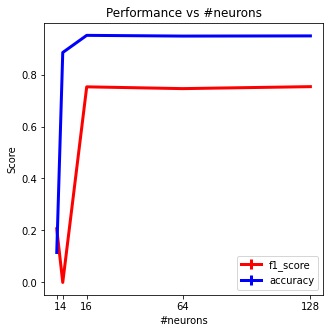

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.errorbar(H, F1_scores_mean2, F1_scores_stdev2, color='red', linewidth=3, label='f1_score')
plt.errorbar(H, accuracy_mean2, accuracy_stdev2, color='blue', linewidth=3, label='accuracy')
plt.xticks(H)
plt.xlabel('#neurons')
plt.ylabel('Score')
plt.title('Performance vs #neurons')
plt.legend(loc="lower right")

plt.show()

# 7 Part4: Performance Enhancement 
## 7.1Hyperparameter Tuning 

In [ ]:
#hyperaprameter tuning, use the grid search to tune the hyperparameter of a three-hidden-layer
#to predict whether or not the wate quality is safe 
#top 15 features from section6.1 for training and testing
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [ ]:
test_data = pd.read_csv("/content/test.csv")
features = features15

In [ ]:
mean_val = test_data.mean(axis = 0) #mean values for each of the column 
iteration = 0
for column in test_data: #replace the null value to mean_value of the columns
  if column != 'is_safe':
    test_data[column] = test_data[column].fillna( mean_val[column])
test_data.shape

(800, 21)

In [ ]:
test_data =test_data.drop_duplicates()

In [ ]:
test_data.shape

(800, 21)

In [ ]:
#test_data[features] = test_data[features]/(np.max(test_data[features].values) - np.min(test_data[features].values)) # standardize test)data csv 
scaler3 = StandardScaler()
scaler4 = StandardScaler()

X_test_data_HT = test_data[features] #15features from test data set 
Y_test_data_HT = test_data['is_safe']
#X_train_data_HT = training_data[features] #standardize 15feature values from trainng data set 
#Y_train_data_HT = training_data['is_safe']
#train_data_HT = train_data_HT/(np.max(train_data_HT.values) - np.min(train_data_HT.values)) #standardize the trainnig_data 
X_test_data_HT, Y_test_data_HT = make_classification(n_samples=200, random_state=4211)

In [ ]:
X_train, X_cv, Y_train, Y_cv = train_test_split(X_test_data_HT, Y_test_data_HT, test_size = 0.2, random_state =4211) #X_test, X_cv are 15 features and Y_test,Y_cv is safe features 
scaler3.fit(X_train)
scaler3.transform(X_train) # standardize using the mean and std from train.csv trainset 
scaler4.fit(X_cv)
scaler4.transform(X_cv)   #standardize using the mean and std from train.csv tesset 
mlp = MLPClassifier(early_stopping = True, random_state = 4211) #trying to optimize the mlp classifer
learning_rates = [0.1 ,0.2]
param = {
      'hidden_layer_sizes': [(16, 16, 16), (64, 64, 64), (128, 128, 128)],
      'learning_rate': ['constant'],
      'learning_rate_init': [0.001, 0.1],
      'activation': ["relu"],
      'solver': ['sgd']
    }
grid_search = GridSearchCV(mlp, param, cv = 5, scoring = 'accuracy', verbose = True) 
grid_search.fit(X_train, Y_train)
grid_search.cv_results_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'mean_fit_time': array([0.06448717, 0.05839171, 0.11152072, 0.09967771, 0.13570032,
        0.13886347]),
 'std_fit_time': array([0.01884535, 0.00774879, 0.01072873, 0.01809155, 0.02849876,
        0.04978147]),
 'mean_score_time': array([0.0014401 , 0.0013124 , 0.00235257, 0.00155783, 0.00168037,
        0.00170484]),
 'std_score_time': array([1.56196336e-04, 3.60986830e-05, 7.63784650e-04, 1.84945519e-04,
        6.10755623e-05, 1.12920597e-04]),
 'param_activation': masked_array(data=['relu', 'relu', 'relu', 'relu', 'relu', 'relu'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(16, 16, 16), (16, 16, 16), (64, 64, 64), (64, 64, 64),
                    (128, 128, 128), (128, 128, 128)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=['constant', 'constant', '

In [ ]:
#use the best model to make predictions 
#pred = grid_search.predict(X_cv.values)
#grid_search.best_score_
best_model_param = param = {
      'hidden_layer_sizes': [(16, 16, 16)],
      'learning_rate': ['constant'],
      'learning_rate_init': [0.1],
      'activation': ["relu"],
      'solver': ['sgd']
    }
grid_search_best = GridSearchCV(mlp, best_model_param, cv = 5, scoring = 'accuracy', verbose = True)

In [ ]:
grid_search_best.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, random_state=4211),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(16, 16, 16)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.1], 'solver': ['sgd']},
             scoring='accuracy', verbose=True)

In [ ]:
pred = grid_search_best.predict(X_cv)
grid_search_best.score(X_cv, Y_cv)

0.9

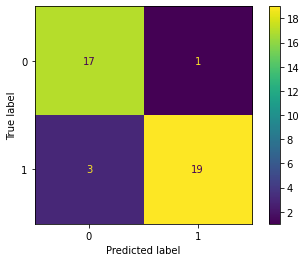

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#plot_confusion_matrix(grid_search_best, X_cv, Y_cv)
cm = confusion_matrix(Y_cv, pred, labels=grid_search_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_best.classes_)
disp.plot()

In [ ]:
f1_score(Y_cv, pred)

0.9047619047619048

In [ ]:
accuracy_score(Y_cv, pred)

0.9

## 7.2. Oversampling

In [ ]:
#import libraries for SGD classifier 
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
#use X_test_data_HT, use Y_test_data_HT 
#X_test_os = test_data[features]
#Y_test_data_OS = test_data['is_safe']
#X_test_data_OS, Y_test_data_OS = make_classification(n_samples=200, random_state=4211)
SGD1 = SGDClassifier(random_state = 4211, early_stopping = True, class_weight="balanced", loss = 'log_loss')
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 4211)
XTRO, YTRO = oversample.fit_resample(X_train, Y_train)
SGD1.fit(XTRO,YTRO)
pred = SGD1.predict(X_cv)
actual = np.array(Y_cv)
print(accuracy_score(actual, pred)) #actual value and predicted value 
print(f1_score(actual, pred))
#print(classification_report(actual, pred))

0.925
0.9333333333333332


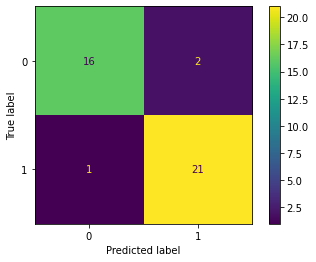

In [ ]:
cm = confusion_matrix(Y_cv, pred, labels=SGD1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SGD1.classes_)
disp.plot()

In [ ]:

#another SGD model with different weights 
SGD2 = SGDClassifier(random_state = 4211, early_stopping = True, class_weight={0:2,1:8}, loss = 'log_loss')
XTRO1, YTRO1 = oversample.fit_resample(X_train, Y_train)
SGD2.fit(XTRO1,YTRO1)
pred2 = SGD2.predict(X_cv)
actual2 = np.array(Y_cv)
print(accuracy_score(actual2, pred2))
print(f1_score(actual2, pred2))

0.9
0.9090909090909091


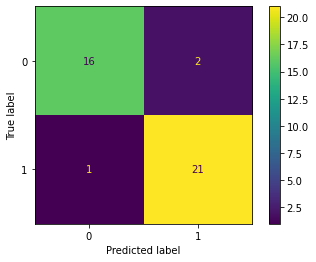

In [ ]:
cm = confusion_matrix(Y_cv, pred, labels=SGD2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SGD2.classes_)
disp.plot()